In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def find_neighbours(data, point_index, eps):
    neighbours = []
    for i, point in enumerate(data):
        if euclidean_distance(data[point_index], point) < eps and i != point_index:
            neighbours.append(i)
    return neighbours

In [3]:
def expand_cluster(data, labels, point_index, neighbours, cluster_id, eps, min_samples):
    labels[point_index] = cluster_id
    i = 0
    while i < len(neighbours):
        neighbour = neighbours[i]
        if labels[neighbour] == -1:
            labels[neighbour] = cluster_id
        elif labels[neighbour] == 0:
            labels[neighbour] = cluster_id
            new_neighbours = find_neighbours(data, neighbour, eps)
            if len(new_neighbours) >= min_samples:
                neighbours.extend(new_neighbours)
        i += 1

In [4]:
def dbscan(data, eps, min_samples):
    labels = [0] * len(data) 
    cluster_id = 0
    for i in range(len(data)):
        if labels[i] != 0:
            continue
        neighbours = find_neighbours(data, i, eps)
        if len(neighbours) < min_samples:
            labels[i] = -1  
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbours, cluster_id, eps, min_samples)
    return labels

In [5]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
eps = 0.2
min_samples = 5

In [6]:
labels = dbscan(X, eps, min_samples)
labels = np.array(labels)

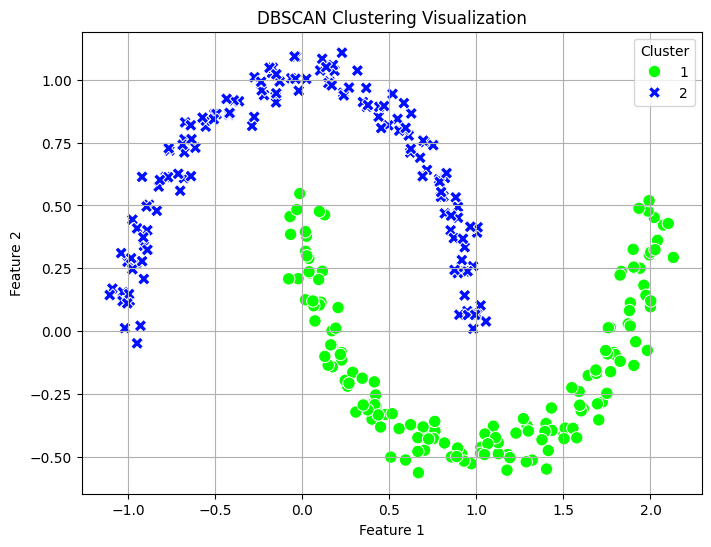

In [7]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("hsv", np.unique(labels[labels > 0]).size)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=palette, legend="full", style=labels,
                markers=True, s=80)

plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()